In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

2023-05-25 00:36:37.741505: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 00:36:37.792481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 00:36:37.793412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 00:36:39.178756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv('./data/Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
prices = data['Open'].values
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

In [5]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [6]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [8]:
sequence_length = 60

X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

In [9]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 0.1047
Epoch 2/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 4/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 5/50
30/30 [==============================] - 0s 9ms/step - loss: 9.6833e-04
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 8.2529e-04
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 7.3887e-04
Epoch 8/50
30/30 [==============================] - 0s 12ms/step - loss: 6.8223e-04
Epoch 9/50
30/30 [==============================] - 0s 8ms/step - loss: 6.4455e-04
Epoch 10/50
30/30 [==============================] - 0s 8ms/step - loss: 7.4221e-04
Epoch 11/50
30/30 [==============================] - 0s 10ms/step - loss: 6.1365e-04
Epoch 12/50
30/30 [==============================] - 0s 8ms/step - loss: 5.7603e-04
Epoch 13/50
30/

In [11]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

6/6 [==============================] - 0s 4ms/step - loss: 3.2315e-04
Test Loss: 0.0003231469599995762


In [12]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

6/6 [==============================] - 0s 3ms/step


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))
print('RMSE:', rmse)

mape = mean_absolute_percentage_error(y_test, predicted_prices)
print('MAPE:', mape)

RMSE: 752.0201190493763
MAPE: 855.7307677030964


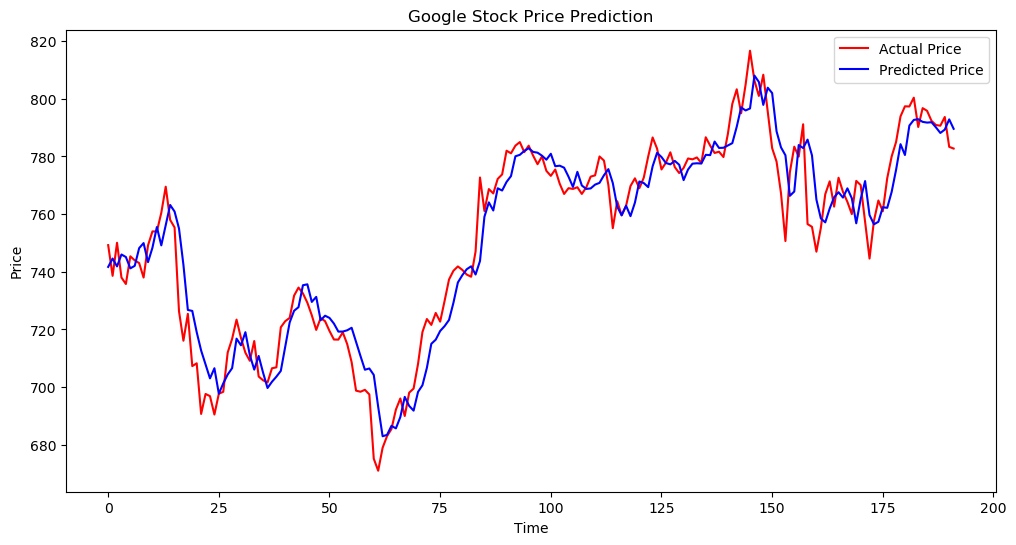

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
